<a href="https://colab.research.google.com/github/zeberity123/nvidia-voice-audio-chatbot/blob/main/Mel_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# use tab for google drive mount

###Understanding Mel Spectorgram

1. 시그널: 시간의 흐름에 따른 변화량
-> 오디오에서는 변화량을 공기압이라 판단
-> 공기압을 디지털화 -> 공기압 샘플링 44.1kHz(초당 44100 샘플)
-> 출력: 웨이브 형태: 해석, 분석, 해석

In [3]:
import librosa  # package for music and audio analysis
import librosa.display
import matplotlib.pyplot as plt

### MUSDB18

MUSDB18 데이터셋의 한 음원파일을 샘플로 Mel Spectogram을 분석해보겠습니다. 우선 MUSDB18 데이터셋의 특징에 관해 설명부터하겠습니다.

다양한 스타일의 150가지 곡을 담은 데이터셋으로 원곡과 원곡을 변조한 곡들로 트레이닝 데이터셋과 테스트 데이터셋으로 나뉘어져있습니다.

이 데이터셋은 음원 분리기를 평가하기 위한 목적으로 만들어져 있습니다. 이 데이터셋으로 원곡과 변조곡을 서로 구분할수 있는지 판단하는 모델에 쓰입니다. 대표적으로는 노래방 기계의 음원 변조 기능들을 볼수 있죠.

MUSDB18은 STEMS로 encoding되어있고 멀티 스트림 파일로 읽어드릴때 ffmpeg 형태에 의존해야한다.
그래서 이 데이터셋은 stempeg(STEMS+ffmpeg) wrapper를 제공해 데이터 파싱과 stem 트랙 디코딩을 바로 가능하게 하도록 만들어져있다.

### What are these words???

###STEMS

What is a Stem file?
Stem 파일은 하나의 트랙을 4개의 음악적 요소로 분리해놓은 파일을 의미한다.
- Drum Stem
-Bassline Stem
-Harmony Stem
-Lead Stem

또한 플레이백을 위한 원곡 트랙도 존재합니다.

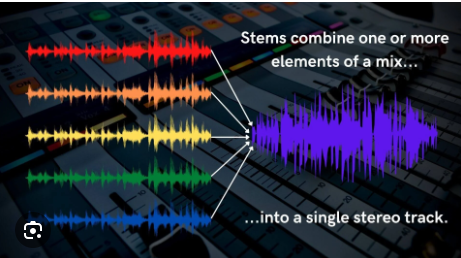

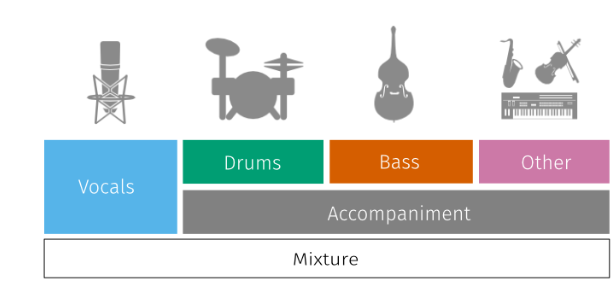

###ffmpeg

- ffmpeg - 미디어 포맷 변환 도구
- ffplay - 간이 파일 재생기
- ffprobe - 미디어 정보 표시 도구
- ffserver - 라이브 방송을 하는 멀티미디어 스트리밍 서버. 버전 3.4이후 제거되었다.
- libavcodec - 오디오/비디오 코덱 라이브러리
- libavformat - 멀티미디어 컨테이너의 디먹서/먹서 라이브러리
- libavdevice - 입출력 장치 제어 라이브러리
- libavfilter - 미디어 필터 라이브러리
- libswscale - 이미지 처리 라이브러리
- libswresample - 오디오 처리 라이브러리

### SIgnal Processing

<ipython-input-7-a691d229a2b8>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('/content/drive/MyDrive/Audio_Project/Triviul - Dorothy.stem.mp4')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Text(0, 0.5, 'Amplitude')

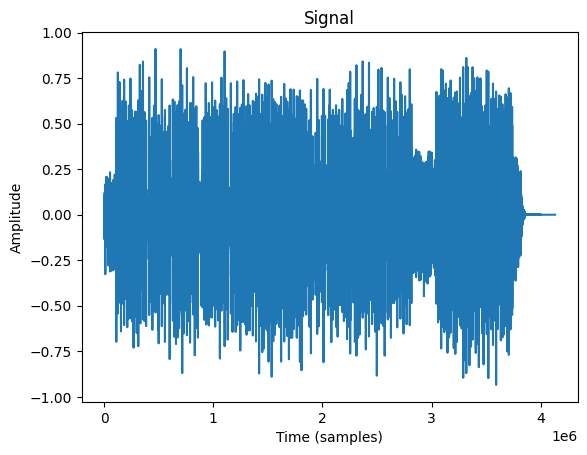

In [7]:
y, sr = librosa.load('/content/drive/MyDrive/Audio_Project/Triviul - Dorothy.stem.mp4')

plt.plot(y)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

### Fourier Transform

시그널 프로세싱으로 음원파일을 디지털화 시켰으나 이제 이것을 깔끔하고 보기 쉽게 정리해놓을 필요가 있다. 이때 신호를 푸리에 변환 시키게된다.

오디오 시그널에는 다양한 단일 주파수로 얽한채 존재한다.
음원 샘플을 채취하는 동안에는 이 주파수들이 모두 얽힌 결과물만 캡쳐하게된다.
푸리에 변환은 수식으로 이러한 신호를 단일 주파수들 및 개별 진폭들로 나눠주는 기능을 제공해준다. 다른말로 하나의 신호를 시간의 흐름으로한 도메인에서 주파수를 기준으로하는 도메인으로 변환시켜주는 역할을 한다.
주파수 도메인으로 바뀐 이런 결과물을 spectrum이라고 말한다.

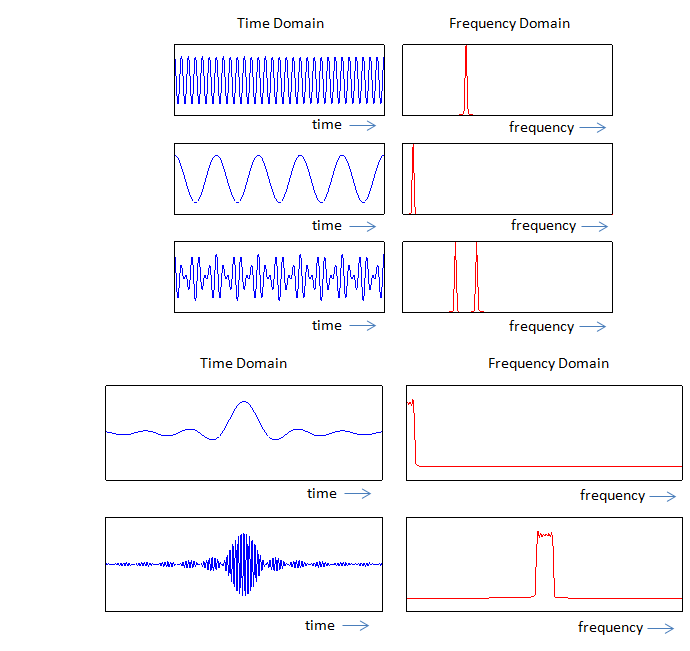

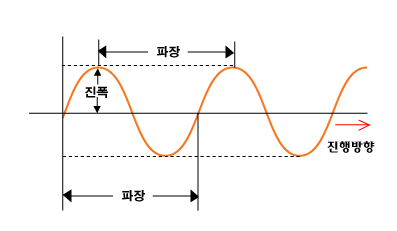

푸리에 변환이 가능한 이유는 모든 파장을 사인 코사인 웨이브로 분할 시킬수 있기 때문이다.

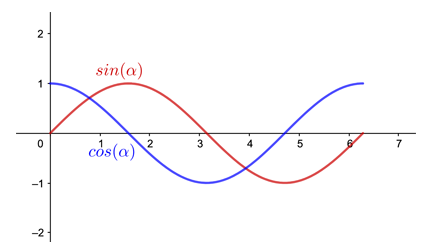

신호 프로세싱에는 fast Fourier Transform(FFT)를 흔히 사용한다.

Text(0, 0.5, 'Amplitude')

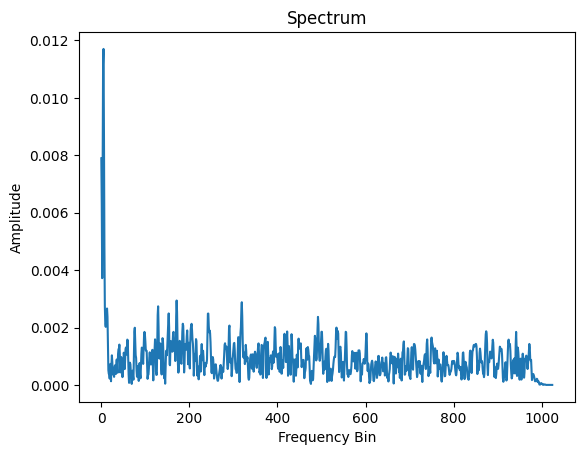

In [9]:
import numpy as np

n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1)) # stft(short-time Fourier Transform)

plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

###The Spectogram

FFT로 신호 분석이 쉬워졌으나 만일 신호 주파수가 항상 변화한다면 어떻게해야될까?
음악은 특히 주파수가 흔히 변화한다. 이러한 신호 형태를 non periodic signal이라고 부른다.
시간의 흐름에 따른 신호의 변화를 계속 표현할 수 있는 방법이 필요하다. 결론부터 말하자면 FFT 결과물을 여러번 출력시키면된다. 이를 해주는것이 stft(short-time Fourier Transform이다)
이를 써서 서로 겹치는 FFT의 결과물들을 분석하기 좋게 분류시키면 spectogram이 된다.

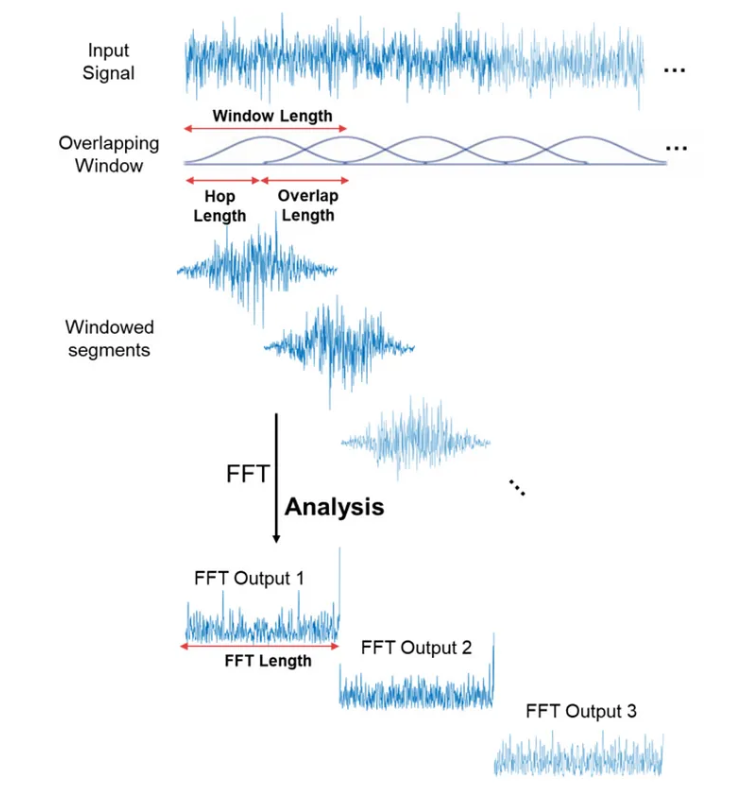

서로 중첩하는 FFT를 스팩토그램으로 분류시 신호의 소리 크기랑 파장을 분류해 분석하기 좋게 정리해 놓을수 있다.

Text(0.5, 1.0, 'Spectogram')

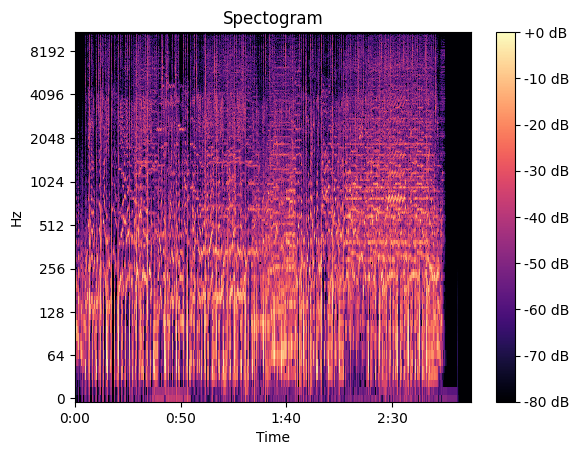

In [13]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)

librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectogram')

###Who's Mel???

다양한 연구결과 일반적으로 사람들은 주파수가 낮은 신호를  높은 신호보다 더 잘 감지한다고 합니다. 예를들어 500Hz <-> 1000Hz의 변화에 따른 소리의 변화를
10000Hz <-> 10500Hz 보다 더 잘 감지한다고합니다.


Mel-scale은 이러한 pitch에서 발견한 사람의 음을 인지하는 기준(threshold)을 반영한 scale 변환 함수이다.
[Hz -> 음계]의 관계가 exponential하기 때문에 주파수를 바로 linear하게 다루지 말고, log함수를 통과시켜 mel scale로 바꾼다음, linear하게 다루자는 것이다.

결국 mel specrogram은 mel scale을 적용한 주파수 변화를 의미한다.

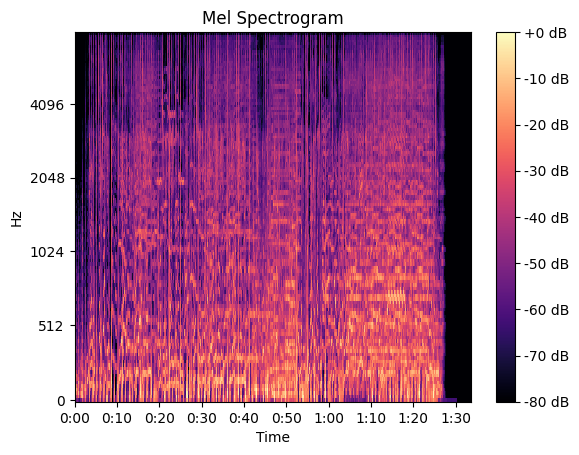

In [14]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')